Loading the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



Read a train.csv file and store data as dataframes in train_df variable for further process.
To verify data is successfully stored in train_df variable printed the top 10 data using head() function




In [ ]:
train_df = pd.read_csv('/content/train/train.csv')
train_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


Creating a copy is a good practice as it stores the original data securely. So crating a copy of train_df.



In [ ]:
crypto_data_train = train_df.copy()

Read a asset_details.csv file and store data as dataframes in asset_details variable for further process.
To verify data is successfully stored in train_df variable printed the data.

In [ ]:
asset_details = pd.read_csv('/content/asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


# <center>Exploratory data analysis</center> 

## Column Description
*   **timestamp**: All timestamps are returned as second Unix timestamps (the number of seconds elapsed since 1970-01-01 00:00:00.000 UTC). Timestamps in this dataset are multiple of 60, indicating minute-by-minute data.
*   **Asset_ID**: The asset ID corresponding to one of the crytocurrencies (e.g. `Asset_ID = 1` for Bitcoin). The mapping from `Asset_ID` to crypto asset is contained in `asset_details.csv`.
*   **Count**: Total number of trades in the time interval (last minute).
*   **Open**:	Opening price of the time interval (in USD).
*   **High**:	Highest price reached during time interval (in USD).
*   **Low**: Lowest price reached during time interval (in USD).
*   **Close**:	Closing price of the time interval (in USD).
*   **Volume**:	The number of cryptoasset units traded during the minute.
*   **VWAP**: The average price of the asset over the time interval, weighted by volume. VWAP is an aggregated form of trade data.
*   **Target**: Residual log-returns for the asset over a 15 minute horizon. 


In [ ]:
data.head() 

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


### Checking Null Rows

In [ ]:
data.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [ ]:
print("Total Null Target Rows = " ,data["Target"].isnull().sum())
print("Percentage of NUll rows in Training Data = {:.2f}%".format(data["Target"].isnull().sum()*100 / data.shape[0] ))

Total Null Target Rows =  750338
Percentage of NUll rows in Training Data = 3.10%


# <center>DATA DISTRIBUTION</center> 

### Training Data Distribution among differnet Assets (Crypto Currencies)

In [ ]:
asset_count= []
for i in range(14):
    count = (data["Asset_ID"]==i).sum()
    asset_count.append(count)
fig = px.bar(x = asset_details.sort_values("Asset_ID")["Asset_Name"],
             y = asset_count , 
             color = asset_count ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Assets")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} ,
        template="plotly_white")
fig.show()

# <center>CANDELSTICK CHARTS</center> 

In [ ]:
def crypto_df(asset_id ,data= data ):
    df = data[data["Asset_ID"]==asset_id].reset_index(drop = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('timestamp')
    return df
btc = crypto_df(asset_id = 1)
eth = crypto_df (asset_id = 6 )
mon = crypto_df(asset_id = 11 )
dog = crypto_df(asset_id = 4 )
bin = crypto_df(asset_id = 0 )

In [ ]:
def candelstick_chart(data,title):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
        'text': '{:} Candelstick Chart'.format(title),
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} , 
    template="plotly_white")

    candlestick.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
    return candlestick

### Bitcoin, Etherreum, Monero, Dogecoin, Binance Coin Candelstick Chart for last few rows

In [ ]:
btc_plot = candelstick_chart(btc[-100:],title = "Bitcoin(BTC)")
btc_plot.show()

eth_plot = candelstick_chart(eth[-250:],title = "Ethereum(ETC)")
eth_plot.show()

mon_plot = candelstick_chart(mon[-500:],title = "Monero")
mon_plot.show()

dog_plot = candelstick_chart(dog[-1100:],title = "Dogecoin")
dog_plot.show()

bin_plot = candelstick_chart(bin[-1200:],title = "Binance Coin")
bin_plot.show()


# <center>OHLC CHARTS</center> 

In [ ]:
def ohlc_chart(data,title):
    ohlc = go.Figure(data = [go.Ohlc(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    ohlc.update_layout(
    title = {
        'text': '{:} OHLC Chart'.format(title),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

    ohlc.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
    return ohlc

### Bitcoin(BTC) OHLC Chart for first 200 rows

In [ ]:
ohlc_chart(btc[:200], title = "Bitcoin(BTC)")

### Ethereum OHLC Chart for first 200 rows

In [ ]:
ohlc_chart(eth[:200], title = "Ethereum")

### Monero OHLC Chart for first 150 rows

In [ ]:
ohlc_chart(mon[:150], title = "Monero")

### Dogecoin OHLC Chart for first 300 rows

In [ ]:
ohlc_chart(dog[:200], title = "Dogecoin")

### Binance Coin OHLC Chart for first 200 rows

In [ ]:
ohlc_chart(bin[:200], title = "Binance Coin")

# <center>AREA PLOTS</center> 

In [ ]:
def vol_traded(data ,title,color):
    area = px.area(data_frame=data,
               x = data.index ,
               y = "Volume",
               markers = True)
    area.update_traces(line_color=color)
    area.update_xaxes(
        title_text = 'Time',
        rangeslider_visible = True)
    area.update_yaxes(title_text = 'Number of trades every minute')
    area.update_layout(showlegend = True,
        title = {
            'text': '{:} Volume Traded'.format(title),
            'y':0.94,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        template="plotly_white")
    return area

### Ethereum(ETH) Volume Traded for last 50 rows

In [ ]:
vol_traded(eth[-50:], "Ethereum (ETH)",color = "Red")

### Ethereum Volume Traded for last 300 rows

In [ ]:
vol_traded(eth[-300:], "Ethereum",color = "Blue")

### Monero Volume Traded for last 200 rows

In [ ]:
vol_traded(mon[-200:], "Monero",color = "Orange")

### Dogecoin Volume Traded for last 250 rows


In [ ]:
vol_traded(dog[-250:], "Dogecoin",color = "Purple")

### Binance Coin Volume Traded for last 300 rows

In [ ]:
vol_traded(dog[-350:], "bin",color = "Red")

**For Ethereum**

In [ ]:
ethereum_df['Close_diff'] = ethereum_df['Close'].diff()
ethereum_df['Range'] = (ethereum_df['High'] - ethereum_df['Low'])
ethereum_df['Volume_diff'] = ethereum_df['Volume'].diff()
ethereum_df['Count_diff'] = ethereum_df['Count'].diff()
ethereum_df = ethereum_df[1:]
ethereum_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
13,1514764920,6,192.0,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,-0.2475,12.65,-103.194715,19.0
21,1514764980,6,120.0,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,-0.7575,15.12,-58.655110,-72.0
29,1514765040,6,156.0,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,-0.4000,15.76,-8.754106,36.0
37,1514765100,6,118.0,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,-1.3975,16.69,27.694113,-38.0
45,1514765160,6,119.0,735.8425,743.80,725.00,735.2000,366.585886,734.816231,-0.001331,-0.5050,18.80,173.507847,1.0
53,1514765220,6,162.0,735.0600,744.73,725.00,734.4050,366.900033,734.549952,-0.002983,-0.7950,19.73,0.314147,43.0
61,1514765280,6,111.0,734.2300,744.03,724.43,735.0900,125.164340,734.399631,-0.004800,0.6850,19.60,-241.735693,-51.0
69,1514765340,6,96.0,735.1800,744.65,725.16,735.3500,153.346749,734.995656,-0.003183,0.2600,19.49,28.182409,-15.0
77,1514765400,6,61.0,734.9500,744.38,725.00,734.4000,98.426401,734.494907,-0.004437,-0.9500,19.38,-54.920348,-35.0
85,1514765460,6,153.0,734.6550,745.32,722.91,734.6950,180.253636,734.805637,-0.003481,0.2950,22.41,81.827236,92.0


## **Ethereum**

**ETHEREUM**





**The ethereum dataset is divided into train and test dataset to further investigate the data. As there are many null values present in Target variable, we use linear interpolation method to fill them. To create a heatmap, we remove all the irrelevant columns.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


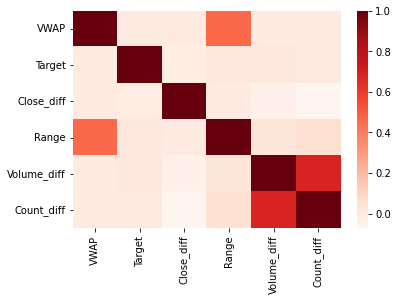

In [ ]:
#for Ethereum
ethereum_df['Target'] = ethereum_df['Target'].interpolate(method = 'linear')  # this function fills the null values on the basis of the linearity of values
# bitcoin_df['Target']
eth_train = ethereum_df[ethereum_df.timestamp <= 1622505660]
eth_test = ethereum_df[ethereum_df.timestamp > 1622505660]
eth_train.drop(['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume'], 1, inplace = True)
eth_test.drop(['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume'], 1, inplace = True)
sns.heatmap(eth_train.corr().values, xticklabels = eth_train.columns, yticklabels = eth_train.columns, cmap = 'Reds')
plt.show()

**As we can infer from the heatmap, Target variable is not much related to other variables**.

**Our target variable is Target variable. We need to predict it using the other 5 independent variables**.

In [ ]:
X_train_eth = eth_train.drop(['Target'],1)
y_train_eth = eth_train.Target
X_train_eth.shape, y_train_eth.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


((1794923, 5), (1794923,))

In [ ]:
X_test_eth = eth_test.drop(['Target'],1)
y_test_eth = eth_test.Target
X_test_eth.shape, y_test_eth.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


((161276, 5), (161276,))

In [ ]:
X_train_eth.head()

,VWAP,Close_diff,Range,Volume_diff,Count_diff
13,738.268967,-0.2475,12.65,-103.194715,19.0
21,737.994457,-0.7575,15.12,-58.655110,-72.0
29,737.303631,-0.4000,15.76,-8.754106,36.0
37,736.163026,-1.3975,16.69,27.694113,-38.0
45,734.816231,-0.5050,18.80,173.507847,1.0


**The values of each column differ a lot from one another. In order to bring them into similar scaling we use Min Max Scaler. It scales all the independent variables in the range from 0 to 1**.


**Standard scalar standardizes features of the data set by scaling to unit variance and removing the mean (optionally) using column summary statistics on the samples in the training set.In this case we use the MinMaxScaler for better results**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range = (0, 1))
X_train_eth1 = X_scaler.fit_transform(X_train_eth)
X_test_eth1 = X_scaler.transform(X_test_eth)
print((X_train_eth1 < 0).any().any())
print((X_test_eth1 < 0).any().any())
print(X_test_eth1)

False
True
[[0.6145411  0.63077004 0.02589583 0.46084331 0.60087977]
 [0.61627987 0.54638664 0.01617708 0.45741755 0.57612558]
 [0.61566527 0.5413729  0.01077083 0.42743086 0.4199931 ]
 ...
 [0.67056487 0.52837655 0.0088125  0.45116549 0.5402622 ]
 [0.67345602 0.6216424  0.022875   0.4557686  0.55830602]
 [0.67446913 0.52380318 0.00986458 0.44787857 0.51136795]]


**The first model we look at is a simple feed forward neural network where we have a single hidden layer between the input and the output layer**. 

**The input shape is the number of columns of the training dataset. The hidden layers are chosen arbitrarily by expirementing with different numbers and the number that fits well is chosen for final output. As the problem in hand is a regression problem, we have only 1 output layer. Initially, the model was built using ReLU, but the results were not that great. As soon as ReLU was replaced with ELU, the results turned out to be better. Therefore we can infer that negative weight values are very important to predict our target variable and hence ELU considers some of these for the final output. Mean absolute error is the standard loss function used for regression problems. We ran the model with different optimizers such as SGD and Adam , where the Adam optimizer gave the best results. 10 epochs are enough to predict the model.The trade off between the training loss and the validation loss is a slight margin which we will try to improve using dropout in the next model**.

Epoch 1/10
18/18 [==============================] - 1s 32ms/step - loss: 0.0416 - val_loss: 0.1605
Epoch 2/10
18/18 [==============================] - 0s 23ms/step - loss: 0.0221 - val_loss: 0.1208
Epoch 3/10
18/18 [==============================] - 0s 23ms/step - loss: 0.0170 - val_loss: 0.0969
Epoch 4/10
18/18 [==============================] - 0s 24ms/step - loss: 0.0132 - val_loss: 0.0729
Epoch 5/10
18/18 [==============================] - 0s 24ms/step - loss: 0.0095 - val_loss: 0.0481
Epoch 6/10
18/18 [==============================] - 0s 23ms/step - loss: 0.0062 - val_loss: 0.0238
Epoch 7/10
18/18 [==============================] - 1s 31ms/step - loss: 0.0040 - val_loss: 0.0089
Epoch 8/10
18/18 [==============================] - 1s 42ms/step - loss: 0.0035 - val_loss: 0.0081
Epoch 9/10
18/18 [==============================] - 0s 24ms/step - loss: 0.0034 - val_loss: 0.0081
Epoch 10/10
18/18 [==============================] - 1s 41ms/step - loss: 0.0034 - val_loss: 0.0082


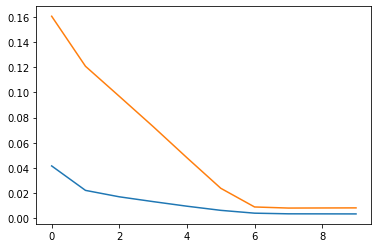

Evaluate on test data
1260/1260 [==============================] - 2s 1ms/step - loss: 0.0082
test loss, test acc: 0.00820318702608347


In [ ]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_eth1.shape[1])),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model.fit(X_train_eth1, y_train_eth, epochs = 10,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()
print("Evaluate on test data")
results = model.evaluate(X_test_eth1, y_test_eth, batch_size=128)
print("test loss, test acc:", results)

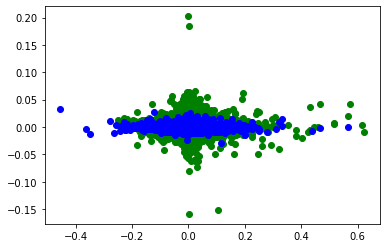

In [ ]:
plt.scatter(model.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
plt.scatter(model.predict(X_test_eth1).flatten(), y_test_eth, color = 'blue')
plt.show()

**The predicted values and the observed values are mostly spread from -0.2 to 0.2 in the x-axis , From the plots above we can infer that the model works decently but still there is room for improvement.**.

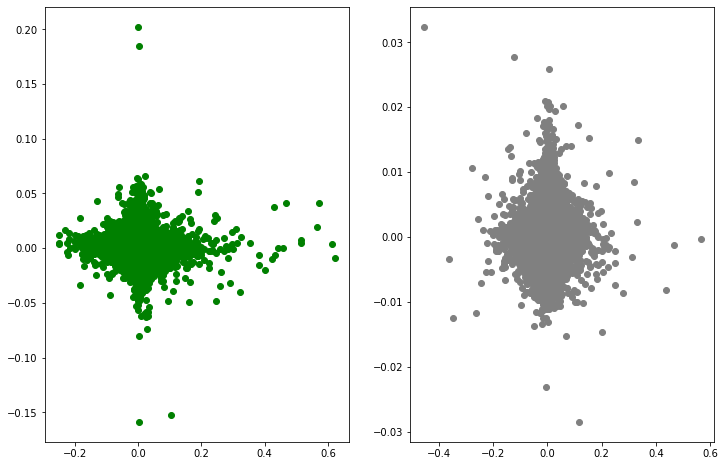

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(model.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
axs[1].scatter(model.predict(X_test_eth1).flatten(), y_test_eth, color = 'grey')
plt.show()

**Lets look at the price differences**.

In [ ]:
print(model.predict(X_test_eth1))
print("###############")
print(y_test_eth)

[[ 0.02487801]
 [-0.01681594]
 [ 0.06340929]
 ...
 [-0.0123047 ]
 [ 0.04049016]
 [ 0.00098652]]
###############
[[-0.00132811]
 [-0.00089612]
 [ 0.00024389]
 ...
 [-0.0003459 ]
 [-0.0003459 ]
 [-0.0003459 ]]


**In the next model we try to see if the results improve if we incorporate the mechanism of regularization and check if the model avoids overfitting**.

**The result seems to be same as the previous model even after incorporating the dropout method with more epochs but the gap between the training and validation loss gets closer **

**We can stop the training by methods such as early stopping to prevent overfitting** 

Epoch 1/20
18/18 [==============================] - 1s 39ms/step - loss: 0.1483 - val_loss: 0.1546
Epoch 2/20
18/18 [==============================] - 1s 32ms/step - loss: 0.1282 - val_loss: 0.1124
Epoch 3/20
18/18 [==============================] - 1s 34ms/step - loss: 0.1136 - val_loss: 0.0918
Epoch 4/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0996 - val_loss: 0.0701
Epoch 5/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0857 - val_loss: 0.0487
Epoch 6/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0727 - val_loss: 0.0303
Epoch 7/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0608 - val_loss: 0.0176
Epoch 8/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0505 - val_loss: 0.0139
Epoch 9/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0416 - val_loss: 0.0145
Epoch 10/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0339 - val_loss: 0.0157
Epoch 11/

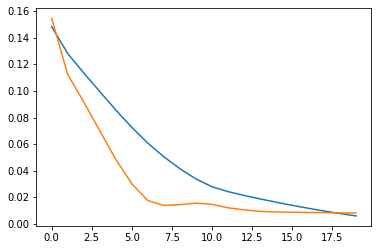

Evaluate on test data
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0082
test loss, test acc: 0.00820318702608347


In [ ]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_eth1.shape[1])),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model_2.fit(X_train_eth1, y_train_eth, epochs = 20,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()
print("Evaluate on test data")
results = model.evaluate(X_test_eth1, y_test_eth, batch_size=128)
print("test loss, test acc:", results)

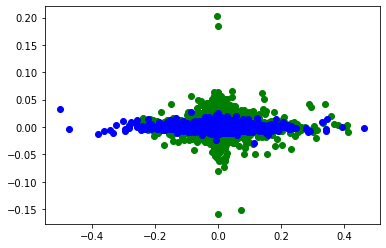

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize = (12,8))
plt.scatter(model_2.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
plt.scatter(model_2.predict(X_test_eth1).flatten(), y_test_eth, color = 'blue')
plt.show()

**The results are much similar to the previous model**.

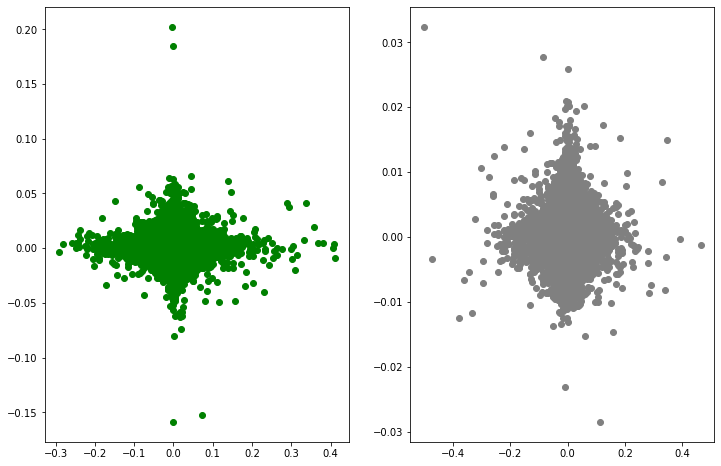

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(model_2.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
axs[1].scatter(model_2.predict(X_test_eth1).flatten(), y_test_eth, color = 'grey')
plt.show()


In [ ]:
print(model_2.predict(X_test_eth1))
print("####################")
print(y_test_eth)

[[-3.4649856e-05]
 [-2.4133561e-02]
 [ 7.6405972e-02]
 ...
 [-1.0647654e-02]
 [ 2.3895321e-02]
 [ 7.3541291e-03]]
####################
[[-0.00132811]
 [-0.00089612]
 [ 0.00024389]
 ...
 [-0.0003459 ]
 [-0.0003459 ]
 [-0.0003459 ]]


**Now we try going to a deeper model , with more hidden layers . But the results are very different as the model reaches saturation and stops learning with a constant value for losses. The prediction are also very centered around 0. From this we infer that a deeper model doesnt guarantee better results**.

Epoch 1/10
18/18 [==============================] - 6s 281ms/step - loss: 0.0241 - val_loss: 0.0014
Epoch 2/10
18/18 [==============================] - 5s 277ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 3/10
18/18 [==============================] - 5s 278ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/10
18/18 [==============================] - 5s 281ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/10
18/18 [==============================] - 5s 280ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/10
18/18 [==============================] - 5s 281ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/10
18/18 [==============================] - 5s 278ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/10
18/18 [==============================] - 5s 279ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/10
18/18 [==============================] - 5s 274ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/10
18/18 [==============================] - 5s 274ms/step - loss: 0.0017 - val_loss: 0.0013

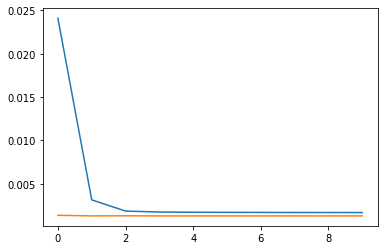

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import matplotlib.pyplot as plt

model_4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_eth1.shape[1])),
    
    tf.keras.layers.Dense(64, activation = 'swish'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(1)
])

model_4.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model_4.fit(X_train_eth1, y_train_eth, epochs = 10,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

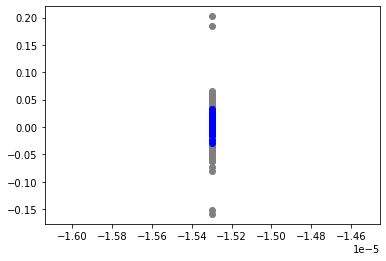

In [ ]:
plt.scatter(model_4.predict(X_train_eth1).flatten(), y_train_eth, color = 'grey')
plt.scatter(model_4.predict(X_test_eth1).flatten(), y_test_eth, color = 'blue')
plt.show()

In [ ]:
print(model_4.predict(X_test_eth1))
print(y_test_eth)

[[-1.5297011e-05]
 [-1.5297011e-05]
 [-1.5297011e-05]
 ...
 [-1.5297011e-05]
 [-1.5297011e-05]
 [-1.5297011e-05]]
21979840   -0.001328
21979854   -0.000896
21979868    0.000244
21979882   -0.000737
21979896   -0.002467
              ...   
24236743   -0.000346
24236757   -0.000346
24236771   -0.000346
24236785   -0.000346
24236799   -0.000346
Name: Target, Length: 161276, dtype: float64


**Now we move on to the Gated Recurrent Unit (GRU) RNNs and LSTM where we need 3D data as input and hence we add 1 more dimension to our existing training dataset**.

In [ ]:
X_train_eth1 = np.array(X_train_eth1)
X_train_eth1 = X_train_eth1.reshape(X_train_eth1.shape[0], X_train_eth1.shape[1], 1)
X_test_eth1 = np.array(X_test_eth1)
X_test_eth1 = X_test_eth1.reshape(X_test_eth1.shape[0], X_test_eth1.shape[1], 1)
X_train_eth1.shape, X_test_eth1.shape

((1794923, 5, 1), (161276, 5, 1))

In [ ]:
y_train_eth = np.array(y_train_eth)
y_train_eth = y_train_eth.reshape(-1,1)
y_test_eth = np.array(y_test_eth)
y_test_eth = y_test_eth.reshape(-1,1)
y_train_eth.shape, y_test_eth.shape

((1794923, 1), (161276, 1))

**Using Tensorflow we build a sequential GRU model. The input layer consists of 2D input data with the the number of columns and batch size as 1. The hidden layer consists of 5 GRUs with 25% dropout rate as the results seem to be converging with more epochs. The output of these GRU units is passed from an ELU function and then into a single output neuron. The loss function and the optimizer are same that of model used before**.

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5)                 120       
                                                                 
 elu_5 (ELU)                 (None, 5)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 10s 316ms/step - loss: 0.0372 - val_loss: 0.0107
Epoch 2/20
18/18 [==============================] - 4s 201ms/step - loss: 0.0107 - val_loss: 1.7600e-04
Epoch 3/20
18/18 [==============================] - 4s 201ms/step - loss: 0.0052 - val_loss: 5.8093e-04
Epoch 4/20

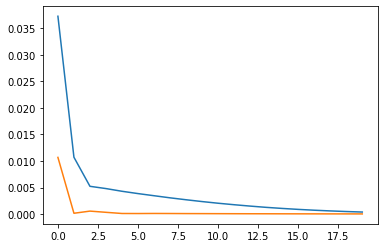

1260/1260 [==============================] - 2s 2ms/step - loss: 5.2392e-05
test loss, test acc: 5.239233360043727e-05


In [ ]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)


# define a recurrent network with Gated Recurrent Units
model_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_eth1.shape[1], 1)),
    tf.keras.layers.GRU(5, dropout = 0.25), 
    tf.keras.layers.ELU(),
    tf.keras.layers. Dense(1)
])

model_gru.compile(loss = 'mean_squared_error', optimizer = 'adam')
model_gru.summary()
history = model_gru.fit(X_train_eth1, y_train_eth, epochs = 20,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()
results = model_gru.evaluate(X_test_eth1, y_test_eth, batch_size=128)
print("test loss, test acc:", results)

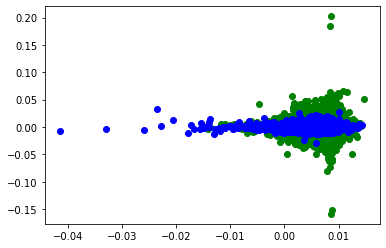

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize = (12,8))
plt.scatter(model_gru.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
plt.scatter(model_gru.predict(X_test_eth1).flatten(), y_test_eth, color = 'blue')
plt.show()

**The prices prediction for GRU are better when compared to both models of the feedforward neural networks , the predicted prices are much closer to the orignal prices and when comapred to the NN**

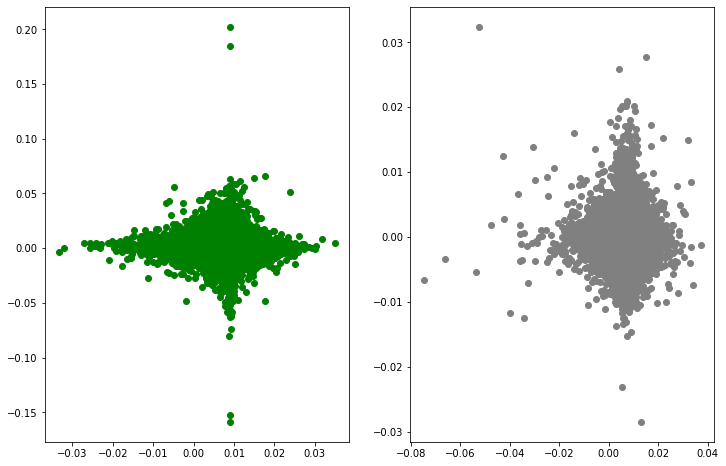

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(model_gru.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
axs[1].scatter(model_gru.predict(X_test_eth1).flatten(), y_test_eth, color = 'grey')
plt.show()

In [ ]:
predicted_prices = model_gru.predict(X_test_eth1)

In [ ]:
print(predicted_prices) 
print("######################")
print(y_test_eth)

[[0.00131303]
 [0.00385143]
 [0.0149858 ]
 ...
 [0.00613474]
 [0.00403272]
 [0.00822078]]
######################
[[-0.00132811]
 [-0.00089612]
 [ 0.00024389]
 ...
 [-0.0003459 ]
 [-0.0003459 ]
 [-0.0003459 ]]


**Next we explore the LSTM method for prediction of prices. The model was expiremented with different dropouts and hidden layer units but the model seems to be suffer from overfitting where there is a huge difference between the training and validation loss.The prediction prices are not bad as the overfitted Feedforward neural network model**.

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 5)              140       
                                                                 
 elu_14 (ELU)                (None, 5, 5)              0         
                                                                 
 dense_32 (Dense)            (None, 5, 1)              6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18/18 [==============================] - 5s 223ms/step - loss: 1.1126e-05 - val_loss: 1.8520e-05
Epoch 2/10
18/18 [==============================] - 4s 209ms/step - loss: 1.1000e-05 - val_loss: 1.8472e-05
Epoch 3/10
18/18 [==============================] - 4s 213ms/step - loss: 1.0885e-05 - val_loss: 1.8431

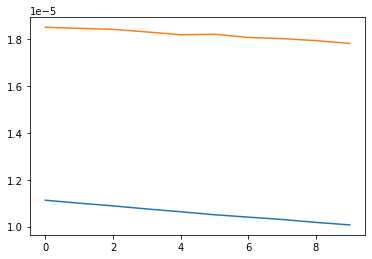

In [ ]:
# define a recurrent network with Gated Recurrent Units
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_eth1.shape[1], 1)),
    tf.keras.layers.LSTM(5,return_sequences = True, dropout = 0.50), 
    tf.keras.layers.ELU(),
    tf.keras.layers. Dense(1),
    
])

model_lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
model_lstm.summary()
history = model_gru.fit(X_train_eth1, y_train_eth, epochs = 10,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

In [ ]:
print(model_lstm.predict(X_test_eth1))
print("########################### ")
print(y_test_eth)

[[[-0.06514208]
  [-0.10491305]
  [-0.07158277]
  [-0.09177459]
  [-0.11548001]]

 [[-0.06529168]
  [-0.0982012 ]
  [-0.06575699]
  [-0.08804561]
  [-0.11149547]]

 [[-0.06523884]
  [-0.09774973]
  [-0.06483463]
  [-0.08481547]
  [-0.09647215]]

 ...

 [[-0.06986573]
  [-0.09960615]
  [-0.06576943]
  [-0.08748015]
  [-0.10828038]]

 [[-0.07010414]
  [-0.10730661]
  [-0.07276336]
  [-0.09199634]
  [-0.11223149]]

 [[-0.07018755]
  [-0.09942853]
  [-0.0657536 ]
  [-0.08717702]
  [-0.10572791]]]
########################### 
[[-0.00132811]
 [-0.00089612]
 [ 0.00024389]
 ...
 [-0.0003459 ]
 [-0.0003459 ]
 [-0.0003459 ]]


**Automatic HyperParameter Optimization using Keras Tuner** 

First we install the package required for Auto tuning of parameters

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 98 kB 6.3 MB/s 


In [ ]:
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras

**Here we create a model , where in we select a predefine set of values for our model and ask the keras-tuner to run through different values and it gives the best values for the parameters**.

In [ ]:
def model_builder(hp):
  '''
  Args:
    hp - Keras tuner object
  '''
  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.InputLayer(input_shape=((X_train_eth1.shape[1]))))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 5-10
  hp_units = hp.Int('units', min_value=5, max_value=10, step=1)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', name='dense2'))
  # Add next layers
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1 , name='dense_last_1'))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.MeanSquaredError()
                )
  return model

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_loss', # objective to optimize
max_epochs=10,
factor=3) # factor which you have seen above  

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

**The following peace of code gives us the best fit of parameters where in the val_loss was minimal**.

In [ ]:
tuner.search(X_train_eth1, y_train_eth, epochs=3, validation_split=0.2 , callbacks=[stop_early])

Trial 27 Complete [00h 07m 41s]
val_loss: 0.00011162061127834022

Best val_loss So Far: 8.901878572942223e-06
Total elapsed time: 01h 47m 33s
INFO:tensorflow:Oracle triggered exit


**Now we create a model with the best parameters determined**.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense2 (Dense)              (None, 5)                 30        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_last_1 (Dense)        (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 1s 36ms/step - loss: 1.6002 - val_loss: 1.7319
Epoch 2/20
18/18 [==============================] - 0s 27ms/step - loss: 1.2286 - val_loss: 1.3378
Epoch 3/20
18/18 [==============================] - 1s 30ms/step - loss: 0.9538 - val_loss: 1.0303
Epoch 4/20
18/18 [=======

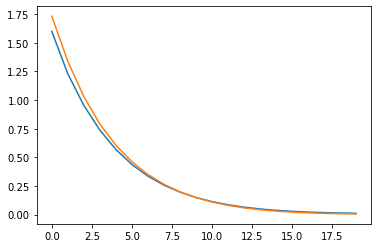

In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()
history = h_model.fit(X_train_eth1, y_train_eth, epochs = 20,batch_size = 100000, validation_data = (X_test_eth1, y_test_eth))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

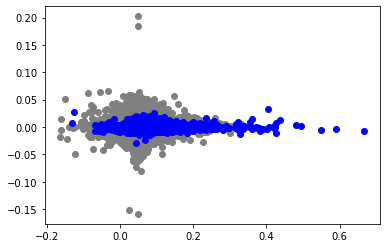

In [ ]:
plt.scatter(h_model.predict(X_train_eth1).flatten(), y_train_eth, color = 'grey')
plt.scatter(h_model.predict(X_test_eth1).flatten(), y_test_eth, color = 'blue')
plt.show()

**The predicted values are pretty much similar to the predicted values in the above FeedForward NN**.

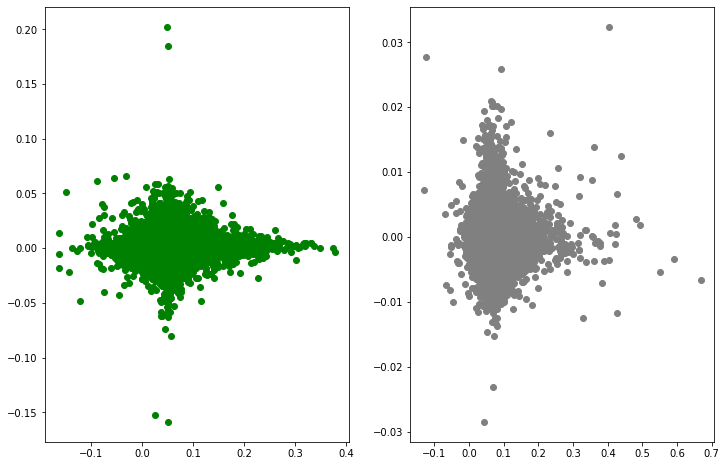

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(h_model.predict(X_train_eth1).flatten(), y_train_eth, color = 'green')
axs[1].scatter(h_model.predict(X_test_eth1).flatten(), y_test_eth, color = 'grey')
plt.show()

In [ ]:
print(h_model.predict(X_test_eth1))
print("########################### ")
print(y_test_eth)

[[0.11597961]
 [0.08796731]
 [0.04016979]
 ...
 [0.07090554]
 [0.0913783 ]
 [0.06377657]]
########################### 
[[-0.00132811]
 [-0.00089612]
 [ 0.00024389]
 ...
 [-0.0003459 ]
 [-0.0003459 ]
 [-0.0003459 ]]


**Approach 2**:-

**In approach 2 for the prediction , we consider all observations of the coins where it widely deemed that other coin prices also have an impact on one particular coin**.

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.layers import Dropout, CuDNNLSTM, GRU, Masking, Embedding, Dense, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Bidirectional

In [ ]:
ds_train = pd.read_csv('/content/drive/My Drive/train.csv')
ds_asset = pd.read_csv('/content/drive/My Drive/asset_details.csv')

In [ ]:
ds_train[ds_train['Target']==np.nan]
ds_train.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [ ]:
ds_train_copy = ds_train
ds_train_copy['date'] = pd.to_datetime(ds_train_copy['timestamp'], unit='s')
ds_train_copy.head()

**Now we seperate each coin based on the Asset ID**

**Break train dataset into by asset and make timestamp as a index**.

In [ ]:
bnc = ds_train_copy[ds_train_copy['Asset_ID']==0].set_index('timestamp')
btc = ds_train_copy[ds_train_copy['Asset_ID']==1].set_index('timestamp')
btcsh = ds_train_copy[ds_train_copy['Asset_ID']==2].set_index('timestamp')
car = ds_train_copy[ds_train_copy['Asset_ID']==3].set_index('timestamp')
dog = ds_train_copy[ds_train_copy['Asset_ID']==4].set_index('timestamp')
eos = ds_train_copy[ds_train_copy['Asset_ID']==5].set_index('timestamp')
eth = ds_train_copy[ds_train_copy['Asset_ID']==6].set_index('timestamp')
eth_csc = ds_train_copy[ds_train_copy['Asset_ID']==7].set_index('timestamp')
iot = ds_train_copy[ds_train_copy['Asset_ID']==8].set_index('timestamp')
ltc = ds_train_copy[ds_train_copy['Asset_ID']==9].set_index('timestamp')
mak = ds_train_copy[ds_train_copy['Asset_ID']==10].set_index('timestamp')
mon = ds_train_copy[ds_train_copy['Asset_ID']==11].set_index('timestamp')
ste = ds_train_copy[ds_train_copy['Asset_ID']==12].set_index('timestamp')
tro = ds_train_copy[ds_train_copy['Asset_ID']==13].set_index('timestamp')
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
timestamp,,,,,,,,,,
1514764860,6,173.0,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809,2018-01-01 00:01:00
1514764920,6,192.0,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,2018-01-01 00:02:00
1514764980,6,120.0,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,2018-01-01 00:03:00
1514765040,6,156.0,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,2018-01-01 00:04:00
1514765100,6,118.0,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,2018-01-01 00:05:00


**Now we check for the start and end date of each crypto coin**

In [ ]:
beg_btcsh = btcsh.index[0].astype('datetime64[s]')
end_btcsh = btcsh.index[-1].astype('datetime64[s]')
beg_bnc = bnc.index[0].astype('datetime64[s]')
end_bnc = bnc.index[-1].astype('datetime64[s]')
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')
beg_eos = eos.index[0].astype('datetime64[s]')
end_eos = eos.index[-1].astype('datetime64[s]')
beg_eth_csc = eth_csc.index[0].astype('datetime64[s]')
end_eth_csc = eth_csc.index[-1].astype('datetime64[s]')
beg_ltc = ltc.index[0].astype('datetime64[s]')
end_ltc = ltc.index[-1].astype('datetime64[s]')
beg_mon = mon.index[0].astype('datetime64[s]')
end_mon = mon.index[-1].astype('datetime64[s]')
beg_tro = tro.index[0].astype('datetime64[s]')
end_tro = tro.index[-1].astype('datetime64[s]')
beg_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')
beg_ste = ste.index[0].astype('datetime64[s]')
end_ste = ste.index[-1].astype('datetime64[s]')
beg_car = car.index[0].astype('datetime64[s]')
end_car = car.index[-1].astype('datetime64[s]')
beg_iot = iot.index[0].astype('datetime64[s]')
end_iot = iot.index[-1].astype('datetime64[s]')
beg_mak = mak.index[0].astype('datetime64[s]')
end_mak = mak.index[-1].astype('datetime64[s]')
beg_dog = dog.index[0].astype('datetime64[s]')
end_dog = dog.index[-1].astype('datetime64[s]')
print('Bitcoin Cash     :', beg_btcsh, 'to', end_btcsh)
print('Binance Coin     :', beg_bnc, 'to', end_bnc)
print('Bitcoin          :', beg_btc, 'to', end_btc)
print('EOS IO           :', beg_eos, 'to', end_eos)
print('Etherium Classic :', beg_eth_csc, 'to', end_eth_csc)
print('Ethereum         :', beg_eth, 'to', end_eth)
print('Lite Coin        :', beg_ltc, 'to', end_ltc)
print('Monero           :', beg_mon, 'to', end_mon)
print('TRON             :', beg_tro, 'to', end_tro)
print('Stellar          :', beg_ste, 'to', end_ste)
print('Cardano          :', beg_car, 'to', end_car)
print('IOTA             :', beg_iot, 'to', end_iot)
print('Maker            :', beg_mak, 'to', end_mak)
print('Dogecoin         :', beg_dog, 'to', end_dog)

Bitcoin Cash     : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Binance Coin     : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Bitcoin          : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
EOS IO           : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Etherium Classic : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Ethereum         : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Lite Coin        : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
Monero           : 2018-01-01T00:01:00 to 2021-09-21T00:00:00
TRON             : 2018-02-06T21:37:00 to 2021-09-21T00:00:00
Stellar          : 2018-02-16T23:53:00 to 2021-09-21T00:00:00
Cardano          : 2018-04-17T09:11:00 to 2021-09-21T00:00:00
IOTA             : 2018-05-09T08:07:00 to 2021-09-21T00:00:00
Maker            : 2018-05-10T15:21:00 to 2021-09-21T00:00:00
Dogecoin         : 2019-04-12T14:34:00 to 2021-09-21T00:00:00


**Reindex all asset to remove the missing data in each timestamp**

In [ ]:
eth     = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
btc     = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
btcsh   = btcsh.reindex(range(btcsh.index[0],btcsh.index[-1]+60,60),method='pad')
bnc     = bnc.reindex(range(bnc.index[0],bnc.index[-1]+60,60),method='pad')
eos     = eos.reindex(range(eos.index[0],eos.index[-1]+60,60),method='pad')
eth_csc = eth_csc.reindex(range(eth_csc.index[0],eth_csc.index[-1]+60,60),method='pad')
ltc     = ltc.reindex(range(ltc.index[0],ltc.index[-1]+60,60),method='pad')
mon     = mon.reindex(range(mon.index[0],mon.index[-1]+60,60),method='pad')
tro     = tro.reindex(range(tro.index[0],tro.index[-1]+60,60),method='pad')
ste     = ste.reindex(range(ste.index[0],ste.index[-1]+60,60),method='pad')
car     = car.reindex(range(car.index[0],car.index[-1]+60,60),method='pad')
iot     = iot.reindex(range(iot.index[0],iot.index[-1]+60,60),method='pad')
mak     = mak.reindex(range(mak.index[0],mak.index[-1]+60,60),method='pad')
dog     = dog.reindex(range(dog.index[0],dog.index[-1]+60,60),method='pad')

**Now we create two functions to computer log returns and to convert datetime to timestamp**.

In [ ]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

 **Now we select some input features from the trading data such as 
5 min log return, abs(5 min log return), upper shadow, and lower shadow** 

In [ ]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low
X_bnc = pd.concat([log_return(bnc.VWAP,periods=15), log_return(bnc.VWAP,periods=1).abs(), upper_shadow(bnc), lower_shadow(bnc)], axis=1)
y_bnc = bnc.Target
X_btc = pd.concat([log_return(btc.VWAP,periods=15), log_return(btc.VWAP,periods=1).abs(), upper_shadow(btc), lower_shadow(btc)], axis=1)
y_btc = btc.Target
X_btcsh = pd.concat([log_return(btcsh.VWAP,periods=15), log_return(btcsh.VWAP,periods=1).abs(), upper_shadow(btcsh), lower_shadow(btcsh)], axis=1)
y_btcsh = btcsh.Target
X_car = pd.concat([log_return(car.VWAP,periods=15), log_return(car.VWAP,periods=1).abs(), upper_shadow(car), lower_shadow(car)], axis=1)
y_car = car.Target
X_dog = pd.concat([log_return(dog.VWAP,periods=15), log_return(dog.VWAP,periods=1).abs(), upper_shadow(dog), lower_shadow(dog)], axis=1)
y_dog = dog.Target
X_eos = pd.concat([log_return(eos.VWAP,periods=15), log_return(eos.VWAP,periods=1).abs(), upper_shadow(eos), lower_shadow(eos)], axis=1)
y_eos = eos.Target
X_eth = pd.concat([log_return(eth.VWAP,periods=15), log_return(eth.VWAP,periods=1).abs(), upper_shadow(eth), lower_shadow(eth)], axis=1)
y_eth = eth.Target
X_eth_csc = pd.concat([log_return(eth_csc.VWAP,periods=15), log_return(eth_csc.VWAP,periods=1).abs(), upper_shadow(eth_csc), lower_shadow(eth_csc)], axis=1)
y_eth_csc = eth_csc.Target
X_iot = pd.concat([log_return(iot.VWAP,periods=15), log_return(iot.VWAP,periods=1).abs(), upper_shadow(iot), lower_shadow(iot)], axis=1)
y_iot = iot.Target
X_ltc = pd.concat([log_return(ltc.VWAP,periods=15), log_return(ltc.VWAP,periods=1).abs(), upper_shadow(ltc), lower_shadow(ltc)], axis=1)
y_ltc = ltc.Target
X_mak = pd.concat([log_return(mak.VWAP,periods=15), log_return(mak.VWAP,periods=1).abs(), upper_shadow(mak), lower_shadow(mak)], axis=1)
y_mak = mak.Target
X_mon = pd.concat([log_return(mon.VWAP,periods=15), log_return(mon.VWAP,periods=1).abs(), upper_shadow(mon), lower_shadow(mon)], axis=1)
y_mon = mon.Target
X_ste = pd.concat([log_return(ste.VWAP,periods=15), log_return(ste.VWAP,periods=1).abs(), upper_shadow(ste), lower_shadow(ste)], axis=1)
y_ste = ste.Target
X_tro = pd.concat([log_return(tro.VWAP,periods=15), log_return(tro.VWAP,periods=1).abs(), upper_shadow(tro), lower_shadow(tro)], axis=1)
y_tro = tro.Target

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Now we select the training and testing time periods and we build a Simple regression model with window size = 1**

In [ ]:

train_window = [totimestamp("01/01/2021"), totimestamp("30/06/2021")]
test_window = [totimestamp("01/07/2021"), totimestamp("30/08/2021")]


X_bnc_train = X_bnc.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_bnc_train = X_bnc.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_bnc_train = y_bnc.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_bnc_train = y_bnc.loc[train_window[0]:train_window[1]].bfill().to_numpy()
X_bnc_test = X_bnc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
X_bnc_test = X_bnc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_bnc_test = y_bnc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_bnc_test = y_bnc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_btc_train = X_btc.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_btc_train = X_btc.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].ffill().to_numpy()  
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].bfill().to_numpy() 
X_btc_test = X_btc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
X_btc_test = X_btc.loc[test_window[0]:test_window[1]].bfill().to_numpy()
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_btcsh_train = X_btcsh.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_btcsh_train = X_btcsh.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_btcsh_train = y_btcsh.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_btcsh_train = y_btcsh.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_btcsh_test = X_btcsh.loc[test_window[0]:test_window[1]].ffill().to_numpy()
X_btcsh_test = X_btcsh.loc[test_window[0]:test_window[1]].bfill().to_numpy()
y_btcsh_test = y_btcsh.loc[test_window[0]:test_window[1]].ffill().to_numpy()
y_btcsh_test = y_btcsh.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_car_train = X_car.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_car_train = X_car.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_car_train = y_car.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_car_train = y_car.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_car_test = X_car.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_car_test = X_car.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_car_test = y_car.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_car_test = y_car.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_dog_train = X_dog.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_dog_train = X_dog.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_dog_train = y_dog.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_dog_train = y_dog.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_dog_test = X_dog.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_dog_test = X_dog.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_dog_test = y_dog.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_dog_test = y_dog.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_eos_train = X_eos.loc[train_window[0]:train_window[1]].ffill().to_numpy() 
X_eos_train = X_eos.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_eos_train = y_eos.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_eos_train = y_eos.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_eos_test = X_eos.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_eos_test = X_eos.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_eos_test = y_eos.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_eos_test = y_eos.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].ffill().to_numpy() 
X_eth_train = X_eth.loc[train_window[0]:train_window[1]].bfill().to_numpy() 
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].ffill().to_numpy() 
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_eth_test = X_eth.loc[test_window[0]:test_window[1]].ffill().to_numpy()  
X_eth_test = X_eth.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_eth_csc_train = X_eth_csc.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_eth_csc_train = X_eth_csc.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
y_eth_csc_train = y_eth_csc.loc[train_window[0]:train_window[1]].ffill().to_numpy()  
y_eth_csc_train = y_eth_csc.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_eth_csc_test = X_eth_csc.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_eth_csc_test = X_eth_csc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_eth_csc_test = y_eth_csc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_eth_csc_test = y_eth_csc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_iot_train = X_iot.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_iot_train = X_iot.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
y_iot_train = y_iot.loc[train_window[0]:train_window[1]].ffill().to_numpy()  
y_iot_train = y_iot.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_iot_test = X_iot.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_iot_test = X_iot.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_iot_test = y_iot.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_iot_test = y_iot.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_ltc_train = X_ltc.loc[train_window[0]:train_window[1]].ffill().to_numpy()  
X_ltc_train = X_ltc.loc[train_window[0]:train_window[1]].bfill().to_numpy()
y_ltc_train = y_ltc.loc[train_window[0]:train_window[1]].ffill().to_numpy()
y_ltc_train = y_ltc.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_ltc_test = X_ltc.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_ltc_test = X_ltc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_ltc_test = y_ltc.loc[test_window[0]:test_window[1]].ffill().to_numpy() 
y_ltc_test = y_ltc.loc[test_window[0]:test_window[1]].bfill().to_numpy() 

X_mak_train = X_mak.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_mak_train = X_mak.loc[train_window[0]:train_window[1]].bfill().to_numpy()   
y_mak_train = y_mak.loc[train_window[0]:train_window[1]].ffill().to_numpy()   
y_mak_train = y_mak.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_mak_test = X_mak.loc[test_window[0]:test_window[1]].ffill().to_numpy()  
X_mak_test = X_mak.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_mak_test = y_mak.loc[test_window[0]:test_window[1]].ffill().to_numpy()
y_mak_test = y_mak.loc[test_window[0]:test_window[1]].bfill().to_numpy()

X_mak_train = X_mak.loc[train_window[0]:train_window[1]].ffill().to_numpy()
X_mak_train = X_mak.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
y_mak_train = y_mak.loc[train_window[0]:train_window[1]].ffill().to_numpy()  
y_mak_train = y_mak.loc[train_window[0]:train_window[1]].bfill().to_numpy()  
X_mak_test = X_mak.loc[test_window[0]:test_window[1]].ffill().to_numpy()   
X_mak_test = X_mak.loc[test_window[0]:test_window[1]].bfill().to_numpy() 
y_mak_test = y_mak.loc[test_window[0]:test_window[1]].ffill().to_numpy()
y_mak_test = y_mak.loc[test_window[0]:test_window[1]].bfill().to_numpy()

X_mon_train = X_mon.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()
X_mon_train = X_mon.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_mon_train = y_mon.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_mon_train = y_mon.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
X_mon_test = X_mon.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()   
X_mon_test = X_mon.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_mon_test = y_mon.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

X_ste_train = X_ste.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_ste_train = y_ste.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
X_ste_test = X_ste.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_ste_test = y_ste.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

X_tro_train = X_tro.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_tro_train = y_tro.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
X_tro_test = X_tro.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_tro_test = y_tro.loc[test_window[0]:test_window[1]].fillna(0).to_numpy()

**Now we use the Standard Scalar for pre - processing before we feed the model to the NN**.

In [ ]:
from sklearn.preprocessing import StandardScaler
# simple preprocessing of the data 
scaler = StandardScaler()

X_bnc_train_scaled = scaler.fit_transform(X_bnc_train)
X_bnc_test_scaled = scaler.transform(X_bnc_test)

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_btcsh_train_scaled = scaler.fit_transform(X_btcsh_train)
X_btcsh_test_scaled = scaler.transform(X_btcsh_test)

X_car_train_scaled = scaler.fit_transform(X_car_train)
X_car_test_scaled = scaler.transform(X_car_test)

X_dog_train_scaled = scaler.fit_transform(X_dog_train)
X_dog_test_scaled = scaler.transform(X_dog_test)

X_eos_train_scaled = scaler.fit_transform(X_eos_train)
X_eos_test_scaled = scaler.transform(X_eos_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_test)

X_eth_csc_train_scaled = scaler.fit_transform(X_eth_csc_train)
X_eth_csc_test_scaled = scaler.transform(X_eth_csc_test)

X_iot_train_scaled = scaler.fit_transform(X_iot_train)
X_iot_test_scaled = scaler.transform(X_iot_test)

X_ltc_train_scaled = scaler.fit_transform(X_ltc_train)
X_ltc_test_scaled = scaler.transform(X_ltc_test)

X_mak_train_scaled = scaler.fit_transform(X_mak_train)
X_mak_test_scaled = scaler.transform(X_mak_test)

X_mon_train_scaled = scaler.fit_transform(X_mon_train)
X_mon_test_scaled = scaler.transform(X_mon_test)

X_ste_train_scaled = scaler.fit_transform(X_ste_train)
X_ste_test_scaled = scaler.transform(X_ste_test)

X_tro_train_scaled = scaler.fit_transform(X_tro_train)
X_tro_test_scaled = scaler.transform(X_tro_test)

**Now , we creat a list of the coins we want to predict prices for where in here we creat a list containing ethereum**.

In [ ]:
list_asset = [['eth',[X_eth_train_scaled,y_eth_train], [X_eth_test_scaled, y_eth_test]]]

**Next we reshape the data into 3D as the RNN's require 3D data**.

In [ ]:
def reshape(X_samples, y_samples):
    print(X_samples.shape)
    X_data = X_samples
    y_data = y_samples
    X_data=X_data.reshape(X_data.shape[0],1, X_data.shape[1])
    y_data=y_data.reshape(y_data.shape[0], 1)
    
    return X_data, y_data

**We create a LSTM model with 3 hidden layers and with a dropout after each hidden layer to avoid overfitting. We also use the ELU activation fucntion which provided with the best results when compared to RELU and swish**.

In [ ]:
def get_model_lstm(x_train):
    TimeSteps=x_train.shape[0]
    TotalFeatures=x_train.shape[2]
    model = Sequential()
    model.add(LSTM(units = 15, activation = 'elu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units = 10, activation = 'elu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units = 5, activation = 'elu', return_sequences=False ))
    model.add(Dropout(0.3))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

**We create a GRU model with 1 hidden layers and with a dropout after the hidden layer to avoid overfitting. We also use the ELU activation fucntion which provided with the best results when compared to RELU and swish.We also modify the learning rate of the Adam optimiser in this model**.

In [ ]:
def get_model_GRU(x_train):
    TimeSteps=x_train.shape[0]
    TotalFeatures=x_train.shape[2]
    model = Sequential()
    model.add(GRU(units = 10, input_shape = (TimeSteps, TotalFeatures)))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1, activation = 'elu'))
    model.compile(optimizer=tf.optimizers.Adam(0.0001), loss = 'mae', metrics=['mse'])
    return model

**Now we create a more deeper model with GRU where we incorporate more hidden layers and units . Here we use the tanh activation function and gave us better results when expirementing with swish , relu and elu**.

In [ ]:
def get_model_GRU2(train_x):
    from tensorflow.keras.optimizers import SGD
    TimeSteps=x_train.shape[0]
    TotalFeatures=x_train.shape[2]
    regressorGRU = Sequential()
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(TimeSteps, TotalFeatures), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(TimeSteps, TotalFeatures), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(TimeSteps, TotalFeatures), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    regressorGRU.add(GRU(units=50, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    regressorGRU.add(Dense(units=1))
    regressorGRU.compile(optimizer=tf.optimizers.Adam(0.0001), loss = 'mae', metrics=['mse'])
    return regressorGRU

In [ ]:
import time
list_models  = []
list_history = []
for dataset in list_asset:
    asset_name = dataset[0]
    x_train = dataset[1][0]
    y_train = dataset[1][1]
    x_test  = dataset[2][0]
    y_test  = dataset[2][1]
    x_train, y_train = reshape(x_train, y_train)
    print(x_train.shape)
    print(y_train.shape)
    model = get_model_lstm(x_train)
    model.summary()
    checkpoint = ModelCheckpoint(asset_name+'_GRU_{epoch:03d}.h5', verbose=1, monitor='loss', save_best_only=True, mode='auto')
    StartTime  = time.time()
    print('Train for ' + asset_name)
    history = model.fit(x_train, 
              y_train, 
              batch_size = 10000, 
              epochs = 5,
              callbacks = [checkpoint])
    EndTime = time.time()
    print("## Total " + asset_name + " Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')
    list_models.append(model)
    list_history.append(history)

(259201, 4)
(259201, 1, 4)
(259201, 1)



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 259201, 15)        1200      
_________________________________________________________________
lstm_1 (LSTM)                (None, 259201, 10)        1040      
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 320       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 2,566
Trainable params: 2,566
Non-trainable params: 0
_________________________________________________________________
Train for eth
Epoch 1/5


2022-02-02 00:14:24.077614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


26/26 [==============================] - 6s 55ms/step - loss: 1.5410e-05

Epoch 00001: loss improved from inf to 0.00002, saving model to eth_GRU_001.h5
Epoch 2/5
26/26 [==============================] - 2s 71ms/step - loss: 1.2727e-05

Epoch 00002: loss improved from 0.00002 to 0.00001, saving model to eth_GRU_002.h5
Epoch 3/5
26/26 [==============================] - 1s 50ms/step - loss: 1.1607e-05

Epoch 00003: loss improved from 0.00001 to 0.00001, saving model to eth_GRU_003.h5
Epoch 4/5
26/26 [==============================] - 1s 45ms/step - loss: 1.1468e-05

Epoch 00004: loss improved from 0.00001 to 0.00001, saving model to eth_GRU_004.h5
Epoch 5/5
26/26 [==============================] - 1s 53ms/step - loss: 1.1360e-05

Epoch 00005: loss improved from 0.00001 to 0.00001, saving model to eth_GRU_005.h5
## Total eth Time Taken:  0 Minutes ##


[1.541031633678358e-05, 1.2726685781672131e-05, 1.1606835869315546e-05, 1.1468425327620935e-05, 1.1359657946741208e-05]


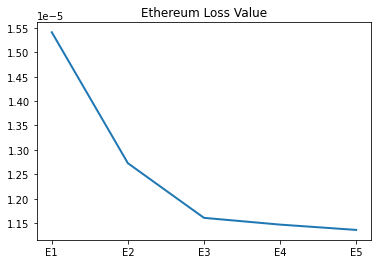

In [ ]:
print(list_history[0].history['loss'])
label_counter = 0
list_label = ['Ethereum']
for hist in list_history:
    fig, ax = plt.subplots()
    e1 = hist.history['loss'][0]
    e2 = hist.history['loss'][1]
    e3 = hist.history['loss'][2]
    e4 = hist.history['loss'][3]
    e5 = hist.history['loss'][4]
    list_y = [e1, e2, e3, e4, e5]
    list_x = ['E1', 'E2', 'E3', 'E4', 'E5']
    ax.plot(list_x, list_y, linewidth=2.0)
    plt.title(list_label[label_counter]+' Loss Value')
    label_counter += 1

In [ ]:
import time
list_models  = []
list_history = []
for dataset in list_asset:
    asset_name = dataset[0]
    x_train = dataset[1][0]
    y_train = dataset[1][1]
    x_test  = dataset[2][0]
    y_test  = dataset[2][1]
    x_train, y_train = reshape(x_train, y_train)
    print(x_train.shape)
    print(y_train.shape)
    model = get_model_GRU(x_train)
    model.summary()
    checkpoint = ModelCheckpoint(asset_name+'_GRU_{epoch:03d}.h5', verbose=1, monitor='loss', save_best_only=True, mode='auto')
    StartTime  = time.time()
    print('Train for ' + asset_name)
    history = model.fit(x_train, 
              y_train, 
              batch_size = 10000, 
              epochs = 5,
              callbacks = [checkpoint])
    EndTime = time.time()
    print("## Total " + asset_name + " Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')
    list_models.append(model)
    list_history.append(history)

(259201, 4)
(259201, 1, 4)
(259201, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Train for eth
Epoch 1/5
26/26 [==============================] - 3s 22ms/step - loss: 0.0740 - mse: 0.0343

Epoch 00001: loss improved from inf to 0.07401, saving model to eth_GRU_001.h5
Epoch 2/5
26/26 [==============================] - 1s 22ms/step - loss: 0.0681 - mse: 0.0307

Epoch 00002: loss improved from 0.07401 to 0.06811, saving model t

[0.074012391269207, 0.06811191886663437, 0.06315397471189499, 0.05826106667518616, 0.05413563922047615]


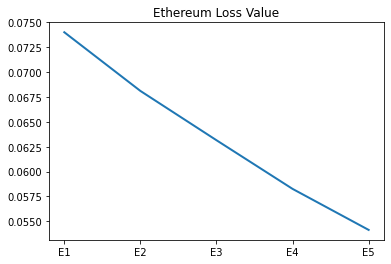

In [ ]:
print(list_history[0].history['loss'])
label_counter = 0
list_label = ['Ethereum']
for hist in list_history:
    fig, ax = plt.subplots()
    e1 = hist.history['loss'][0]
    e2 = hist.history['loss'][1]
    e3 = hist.history['loss'][2]
    e4 = hist.history['loss'][3]
    e5 = hist.history['loss'][4]
    list_y = [e1, e2, e3, e4, e5]
    list_x = ['E1', 'E2', 'E3', 'E4', 'E5']
    ax.plot(list_x, list_y, linewidth=2.0)
    plt.title(list_label[label_counter]+' Loss Value')
    label_counter += 1

In [ ]:
import time
list_models  = []
list_history = []
for dataset in list_asset:
    asset_name = dataset[0]
    x_train = dataset[1][0]
    y_train = dataset[1][1]
    x_test  = dataset[2][0]
    y_test  = dataset[2][1]
    x_train, y_train = reshape(x_train, y_train)
    print(x_train.shape)
    print(y_train.shape)
    model = get_model_GRU2(x_train)
    model.summary()
    checkpoint = ModelCheckpoint(asset_name+'_GRU_{epoch:03d}.h5', verbose=1, monitor='loss', save_best_only=True, mode='auto')
    StartTime  = time.time()
    print('Train for ' + asset_name)
    history = model.fit(x_train, 
              y_train, 
              batch_size = 10000, 
              epochs = 5,
              callbacks = [checkpoint])
    EndTime = time.time()
    print("## Total " + asset_name + " Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')
    list_models.append(model)
    list_history.append(history)

(259201, 4)
(259201, 1, 4)
(259201, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 259201, 50)        8400      
_________________________________________________________________
dropout_2 (Dropout)          (None, 259201, 50)        0         
_________________________________________________________________
gru_2 (GRU)                  (None, 259201, 50)        15300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 259201, 50)        0         
_________________________________________________________________
gru_3 (GRU)                  (None, 259201, 50)        15300     
_________________________________________________________________
dropout_4 (Dropout)          (None, 259201, 50)        0         
_________________________________________________________________
gru_4 (GRU)    

[0.004938234109431505, 0.004111995920538902, 0.0036641941405832767, 0.003334056120365858, 0.003101346082985401]


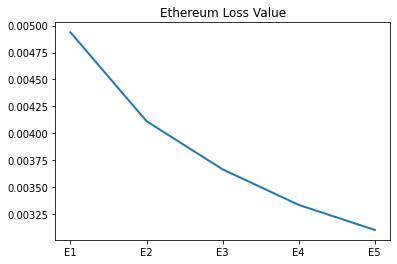

In [ ]:
print(list_history[0].history['loss'])
label_counter = 0
list_label = ['Ethereum']
for hist in list_history:
    fig, ax = plt.subplots()
    e1 = hist.history['loss'][0]
    e2 = hist.history['loss'][1]
    e3 = hist.history['loss'][2]
    e4 = hist.history['loss'][3]
    e5 = hist.history['loss'][4]
    list_y = [e1, e2, e3, e4, e5]
    list_x = ['E1', 'E2', 'E3', 'E4', 'E5']
    ax.plot(list_x, list_y, linewidth=2.0)
    plt.title(list_label[label_counter]+' Loss Value')
    label_counter += 1